## Keras -- MLPs on MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

# **Sample Image in Dataset**

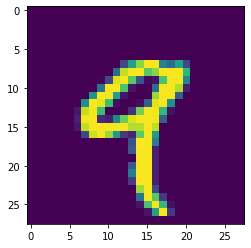

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[4])


# **Overview of Data**

In [ ]:
print(X_train.shape)
print("Number of training examples :", X_train.shape[0], "and each image is of shape :" , (X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape :", (X_test.shape[1], X_test.shape[2]))

(60000, 28, 28)
Number of training examples : 60000 and each image is of shape : (28, 28)
Number of training examples : 10000 and each image is of shape : (28, 28)


In [ ]:
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [ ]:
# after converting the input images from 3d to 2d vectors
print(X_train.shape)
print("Number of training examples :", X_train.shape[0], "and each image is of shape :" ,(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape " ,(X_test.shape[1]))

(60000, 784)
Number of training examples : 60000 and each image is of shape : 784
Number of training examples : 10000 and each image is of shape  784


In [ ]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

# **Normalize the Data**

In [ ]:

# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
#convert y_train into a 10 dimensional vector
# this conversion needed for MLPs 
print("Class label of first image :", y_train[0])
Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Softmax Classifier**


> **MLP + ReLu Activation + Adam Optimizer**








In [ ]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2284 - accuracy: 0.9330 - val_loss: 0.1244 - val_accuracy: 0.9620
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0809 - val_accuracy: 0.9746
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0834 - val_accuracy: 0.9765
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0692 - val_accuracy: 0.9797
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0902 - val_accuracy: 0.9747

In [ ]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


Test loss: 0.09944263845682144
Test accuracy: 0.980400025844574


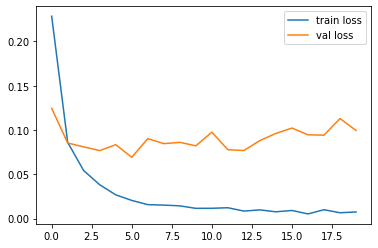

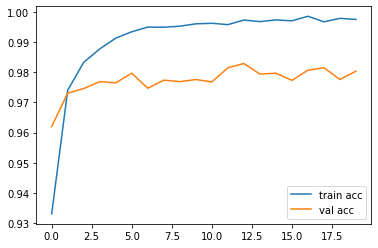

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')